In [24]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from alibi.explainers import IntegratedGradients
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from alibi.datasets import load_cats
from alibi.utils import visualize_image_attr
print('TF version: ', tf.__version__)
print('Eager execution enabled: ', tf.executing_eagerly()) # True

TF version:  2.11.0
Eager execution enabled:  True


In [25]:
image_shape = (224, 224, 3)
data, labels = load_cats(target_size=image_shape[:2], return_X_y=True)
print(f'Images shape: {data.shape}')
data = (data / 255).astype('float32')

Images shape: (4, 224, 224, 3)


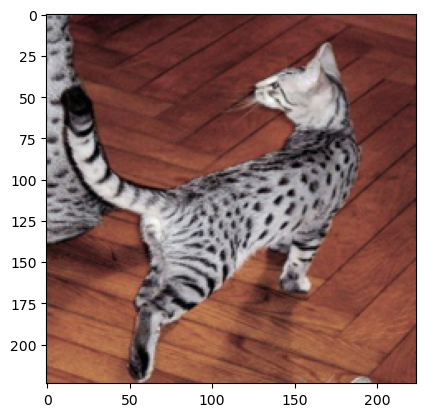

In [33]:
i = 3
plt.imshow(data[i]);

In [34]:
model = ResNet50V2(weights='imagenet')

Calculate integrated gradients
The IntegratedGradients class implements the integrated gradients features attributions method. A description of the
method can be found here.
In the first example, the baselines (i.e. the starting points of the path integral) are black images (all pixel values are
set to zero). This means that black areas of the image will always have zero attributions. In the second example we
consider random uniform noise baselines. The path integral is defined as a straight line from the baseline to the input
image. The path is approximated by choosing 50 discrete steps according to the Gauss-Legendre method.

Here we compute attributions for a single image, but batch explanations are supported (leading dimension assumed to
be batch).

In [49]:
ig = IntegratedGradients(model)
instance = data[i].reshape((1,)+image_shape)
predictions = model.predict(instance).argmax(axis=1)
explanation = ig.explain(instance,baselines=None,target=predictions)

1/1 [==============================] - 0s 82ms/step


In [50]:
# Metadata from the explanation object 'blended_heat_map'
explanation.meta

{'name': 'IntegratedGradients',
 'type': ['whitebox'],
 'explanations': ['local'],
 'params': {'target_fn': None,
  'method': 'gausslegendre',
  'n_steps': 50,
  'internal_batch_size': 100,
  'layer': 0},
 'version': '0.9.0'}

In [51]:
# Data fields from the explanation object
explanation.data.keys()

dict_keys(['attributions', 'X', 'forward_kwargs', 'baselines', 'predictions', 'deltas', 'target'])

In [61]:
 # Get attributions values from the explanation object
attrs = explanation.attributions[0]
print(attrs.shape)
print(attrs.min(),attrs.max())

(1, 224, 224, 3)
-0.013185363700681248 0.012385826538488522


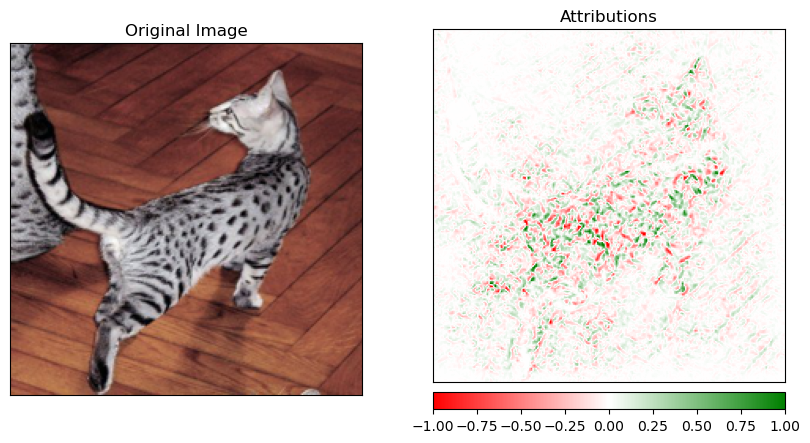

In [62]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
visualize_image_attr(attr=None, original_image=data[i], method='original_image',
title='Original Image', plt_fig_axis=(fig, ax[0]), use_pyplot=False);
visualize_image_attr(attr=attrs.squeeze(), original_image=data[i], method='heat_map',
sign='all', show_colorbar=True, title='Attributions',
plt_fig_axis=(fig, ax[1]), use_pyplot=True);

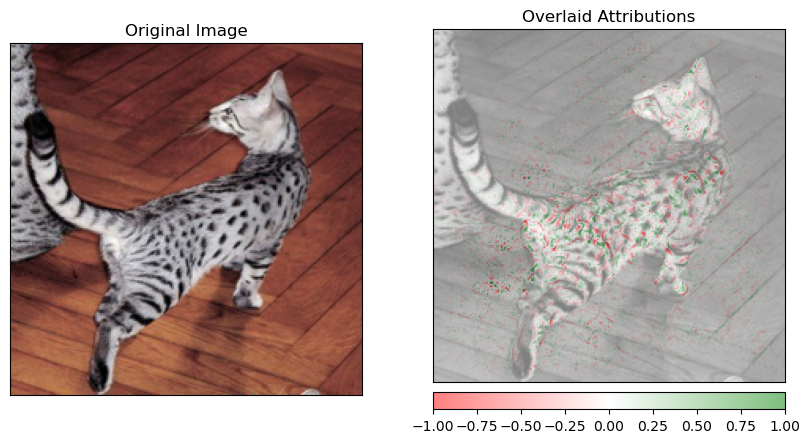

In [54]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
visualize_image_attr(attr=None, original_image=data[i], method='original_image',
title='Original Image', plt_fig_axis=(fig, ax[0]), use_pyplot=False);
visualize_image_attr(attr=attrs.squeeze(), original_image=data[i], method='blended_heat_map',
sign='all', show_colorbar=True, title='Overlaid Attributions',
plt_fig_axis=(fig, ax[1]), use_pyplot=True);

In [64]:
 baselines = np.random.random_sample(instance.shape)

In [65]:
explanation = ig.explain(instance,
baselines=baselines,
target=predictions)

In [66]:
attrs = explanation.attributions[0]

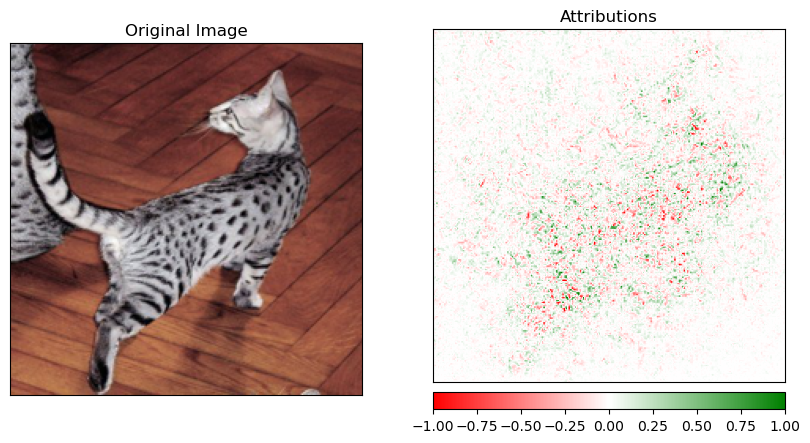

In [67]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
visualize_image_attr(attr=None, original_image=data[i], method='original_image',
title='Original Image', plt_fig_axis=(fig, ax[0]), use_pyplot=False);
visualize_image_attr(attr=attrs.squeeze(), original_image=data[i], method='heat_map',
sign='all', show_colorbar=True, title='Attributions',
plt_fig_axis=(fig, ax[1]), use_pyplot=True);